## Churn analysis
 ### A few questions must be in mind to understand this scenario, also create an idea of what we are looking for:
* Why a client leave the company, and how can be avoid?

Churn is the moment when a client stop doing business with the company.It is a considerable problem, especially in subscription-dependent sectors;

* Why is that important?

Turnover have a direct affects on the budget, also increase costs, it is more expensive capt a new client than keep the ones we already have;

* What's the business problem?

Determine the main factors of customer turnover and predict the chances of a customer leaving.

## Exploring the data:

In [63]:
#set-up libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
#Python version
from platform import python_version
print("Language version python for this notebook:", python_version())

#alert
import warnings
import sys
warnings.simplefilter(action= "ignore", 
category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    

Language version python for this notebook: 3.8.7


Data Sourse : https://www.kaggle.com/blastchar/telco-customer-churn

In [4]:
#Dta frame import CSV
df = pd.read_csv('CHURN.csv')

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#check for missing values
df.duplicated().sum()

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

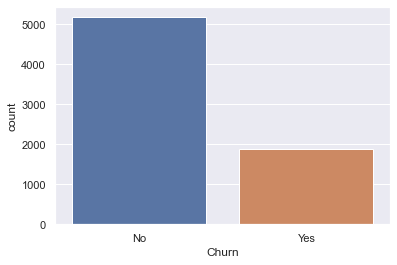

In [6]:
#explore label breakdown

df['Churn'].value_counts()
sns.countplot(df['Churn'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

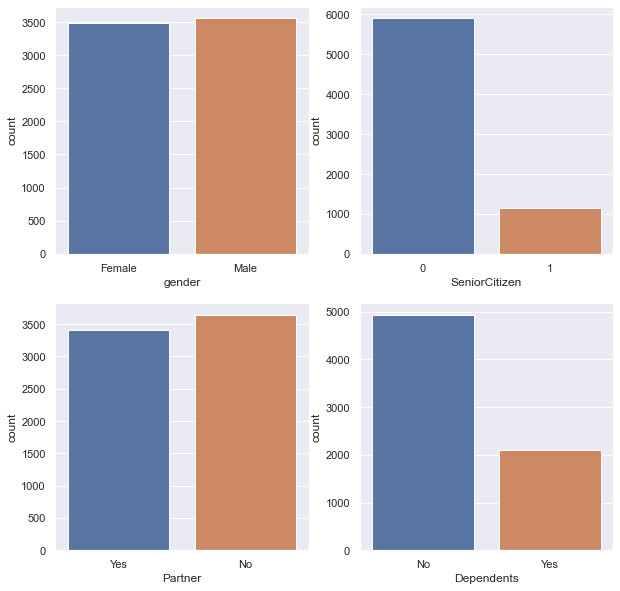

In [7]:
 #explore demographic features quickly
 f, ax = plt.subplots(2,2,figsize=(10,10))

 sns.countplot(df['gender'], ax = ax[0,0])
 sns.countplot(df['SeniorCitizen'], ax=ax[0,1])
 sns.countplot(df['Partner'], ax=ax[1,0])
 sns.countplot(df['Dependents'], ax=ax[1,1])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

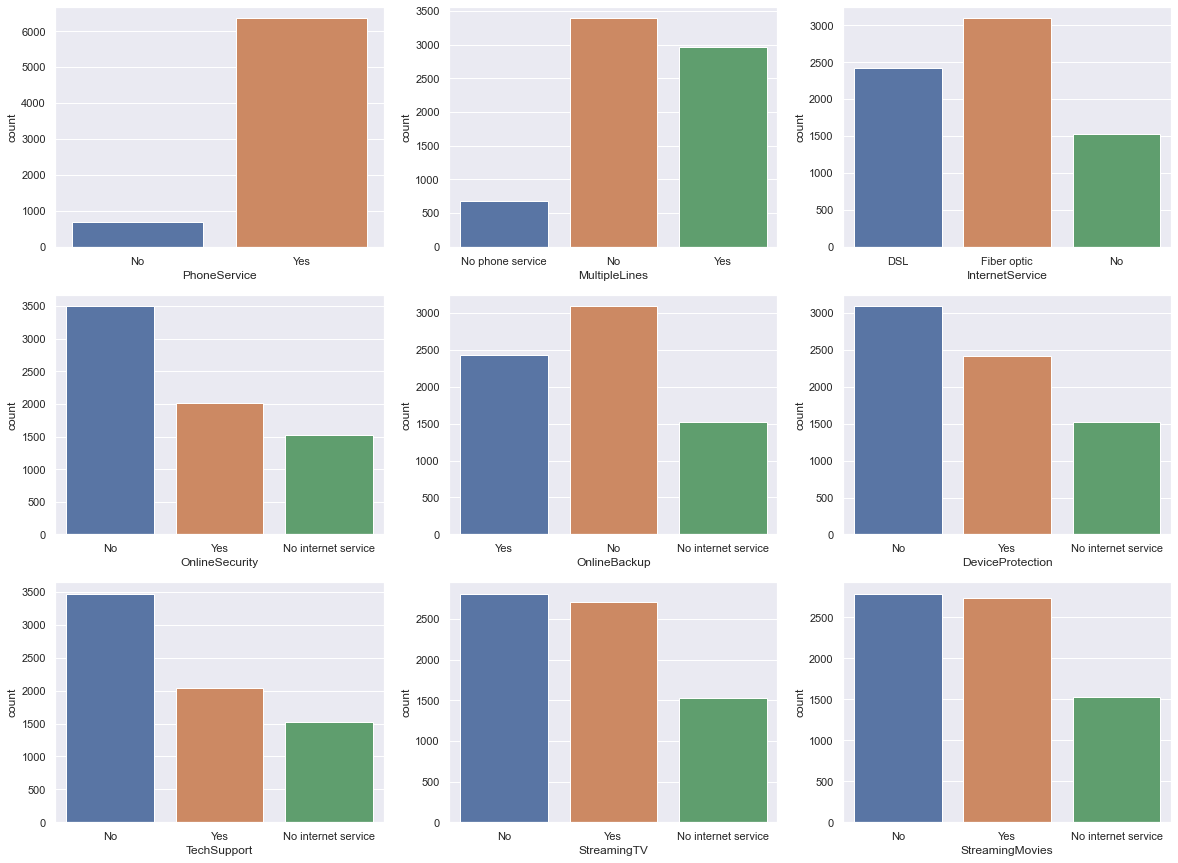

In [8]:
#explore services subscribed to quickly
f, ax = plt.subplots(3,3, figsize=(20,15))

sns.countplot(df['PhoneService'], ax=ax[0,0])
sns.countplot(df['MultipleLines'], ax=ax[0,1])
sns.countplot(df['InternetService'],ax=ax[0,2])
sns.countplot(df['OnlineSecurity'], ax=ax[1,0])
sns.countplot(df['OnlineBackup'], ax=ax[1,1])
sns.countplot(df['DeviceProtection'], ax=ax[1,2])
sns.countplot(df['TechSupport'], ax=ax[2,0])
sns.countplot(df['StreamingTV'], ax=ax[2,1])
sns.countplot(df['StreamingMovies'], ax=ax[2,2])

<AxesSubplot:xlabel='Contract', ylabel='count'>

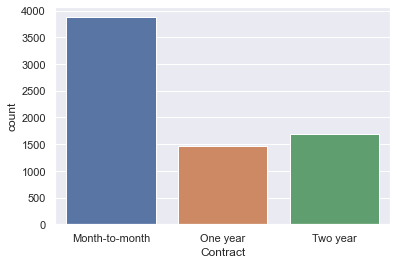

In [9]:
# Explore accounts quickly
df['Contract'].value_counts()
sns.countplot(df['Contract'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

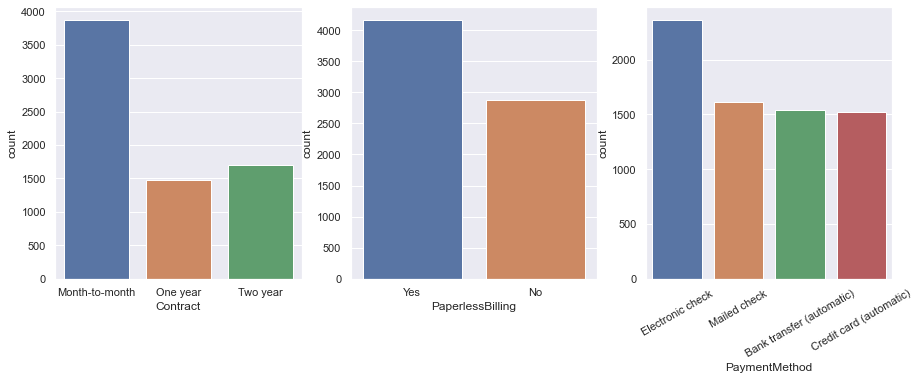

In [10]:
# Explore accounts quickly
f, ax = plt.subplots(1,3, figsize=(15,5))
plt.xticks(rotation=30)

sns.countplot(df['Contract'], ax=ax[0])
sns.countplot(df['PaperlessBilling'], ax=ax[1])
sns.countplot(df['PaymentMethod'], ax=ax[2])


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

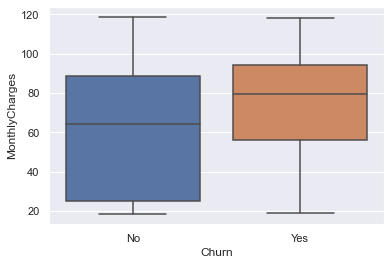

In [11]:
#exploring monthly payments against churns
sns.boxplot('Churn','MonthlyCharges', data=df)

In [12]:
#summarise
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#starting preprocessing Data

In [13]:
# Remove unuseable Information
df.drop(['customerID'], axis=1, inplace=True)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

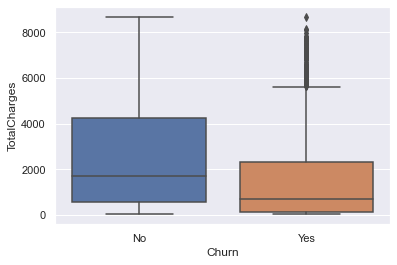

In [14]:
#converting string to numeric value
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df.isna().sum()
df.dropna(inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

#Exploring total charges against churns
sns.boxplot('Churn', 'TotalCharges', data=df)

In [15]:
#converting labels from yes/no to 1/0 for Churn
df['Churn'].replace('Yes',1,inplace=True)
df['Churn'].replace('No',0,inplace=True)

#converting labels from 1/0 to Yes/No for SeniorCitizen
df['SeniorCitizen'].replace(1,'Yes', inplace=True)
df['SeniorCitizen'].replace(0, 'No', inplace=True)

#encode Other variables
df_onehot=pd.get_dummies(df)

df_onehot.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

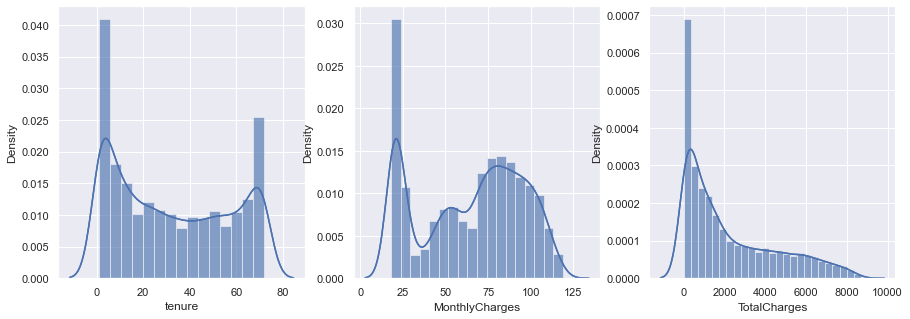

In [16]:
# Visualizing the Distribution before
f, ax = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df_onehot['tenure'], ax=ax[0])
sns.distplot(df_onehot['MonthlyCharges'], ax=ax[1])
sns.distplot(df_onehot['TotalCharges'], ax=ax[2])

sns.distplot(df_onehot['tenure'],color='b', ax=ax[0])
sns.distplot(df_onehot['MonthlyCharges'],color='b', ax=ax[1])
sns.distplot(df_onehot['TotalCharges'],color='b', ax=ax[2])

In [17]:
#running the scale

scaler = MinMaxScaler()
df_onehot['tenure'] = scaler.fit_transform(df_onehot['tenure'].values.reshape(-1,1))
df_onehot['MonthlyCharges'] = scaler.fit_transform(df_onehot['MonthlyCharges'].values.reshape(-1,1))
df_onehot['TotalCharges'] = scaler.fit_transform(df_onehot['TotalCharges'].values.reshape(-1,1))

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

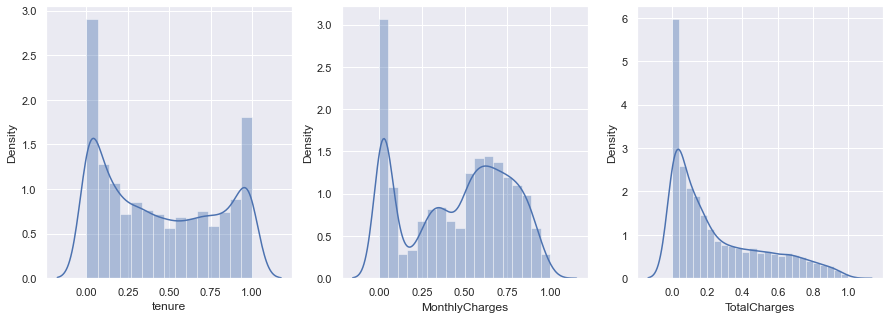

In [18]:
#after scale distribution view
f, ax = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df_onehot['tenure'], ax=ax[0])
sns.distplot(df_onehot['MonthlyCharges'], ax=ax[1])
sns.distplot(df_onehot['TotalCharges'], ax=ax[2])


In [19]:
#Spliting dataset for churn prediction.

x= df_onehot.drop(['Churn'], axis=1)
y= df_onehot['Churn'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=7)

### Construction of the Predictive Machine.

### Baseline

In [20]:
#build and Train model
model= LogisticRegression()
model.fit(x_train, y_train)

# Applying model
y_predict = model.predict(x_test)
actual_vs_predict = pd.DataFrame({'Actual': y_test.flatten(),
                                 'Prediction': y_predict.flatten()})
print(actual_vs_predict.sample(12))

      Actual  Prediction
1040       0           0
1051       0           0
28         0           0
364        0           0
1396       0           0
1060       0           0
1104       0           0
1330       0           0
880        0           0
482        1           0
661        1           1
966        0           0


### Evaluating Predictive machine Baseline
At this stage I'm Evaluating the machine

ROC AUC: 71.65 %


Text(0, 0.5, 'True Positive Rate')

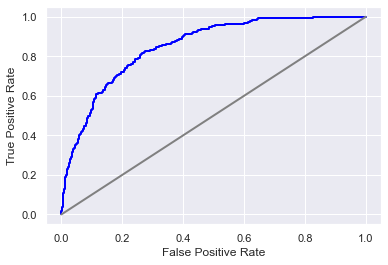

In [25]:
#Evaluate model
print('ROC AUC: %.2f' %(roc_auc_score(y_test,y_predict)*100),'%')

#visualization ROC
y_probs = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr,tpr,lw=2,color='blue')
plt.plot([0,1], [0,1], lw=2,color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Checking Baseline with GBM - Gradient Boosting

In [42]:
#build and train Model
model = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,n_estimators=200,max_features=8,random_state=42)
model.fit(x_train, y_train)

#applying model
y_predict = model.predict(x_test)
actual_vs_predict = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Prediction': y_predict.flatten()
})
print(actual_vs_predict.sample(10))


      Actual  Prediction
163        0           0
1344       1           1
1236       0           0
278        1           1
296        0           0
1129       0           0
764        0           0
200        1           1
1076       0           0
322        0           0


ROC AUC: 71.90 %


Text(0, 0.5, 'True Positive Rate')

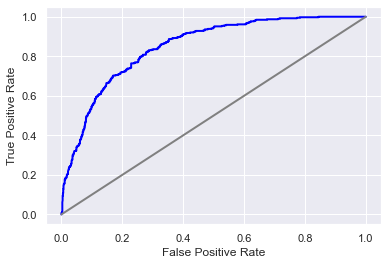

In [43]:
#model Valuation
print('ROC AUC: %.2f' %(roc_auc_score(y_test,y_predict)*100), '%')

#ROC Visualizing
y_probs = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw=2, color='blue')
plt.plot([0,1], [0,1], lw=2, color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Cheking baseline with XGBoost

In [50]:
# Build and train model
model = XGBClassifier (max_depth=3, learning_rate=0.1, n_estimators=200)
model.fit(x_train, y_train)

# Apply model
y_predict = model.predict(x_test)
actual_vs_predict = pd.DataFrame({'Actual': y_test.flatten(),
                                 'Prediction': y_predict.flatten()})
print(actual_vs_predict.sample(12))

[22:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
      Actual  Prediction
528        0           0
844        0           0
468        0           0
1284       0           1
153        1           1
773        0           0
1035       0           0
330        0           0
566        0           0
0          0           0
795        1           1
161        0           0


ROC AUC: 70.77 %


Text(0, 0.5, 'True Positive Rate')

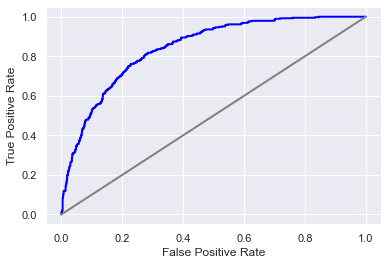

In [51]:
# Evaluate model
print('ROC AUC: %.2f' % (roc_auc_score(y_test,y_predict)*100), '%')

# Visualise ROC
y_probs = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw=2, color='blue')
plt.plot([0,1], [0,1], lw=2, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Conclusion

## Turnover
* We are now capable to visualise clients that can end their contract in the next few months with a ROC AUC of 72%, using the sampling of 7k + clients available on the dataset.

* This model shows better results than a random estimate of 50-50. We gain a relative pressision on any intervention.

* Visualize below the **10 resourses relevants** about the Customer turnover.

## Tendency to terminate the contract

**Clients that intent to leave also have:**

1. Total charges
2. Have a monthly Contract
3. Use Fiber optic as internet service
4. Use eletronic check as payment method
5. Have no thecnical support
6. Have no Online Security
7. Have Streaming muvies packs
8. Have paperless billing
9. Have Streaming TV
10. Senior Citizens
